In [3]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

## Step 1: Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

sns.color_palette("YlGnBu", 10)
pd.set_option('display.max_columns', None)

## Step 2: Reading and understanding the data

Let us import the dataset given and run some analysis on the data to understand what all we have

In [5]:
data = pd.read_csv('./day.csv')

**Shape of the dataframe**

In [6]:
data.shape

(730, 16)

**Info**

- The info the dataframe tells us that there are no empty values.
- All columns are of type number
- One column dteday is of type date. This is a date type column

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Columns**

In [8]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

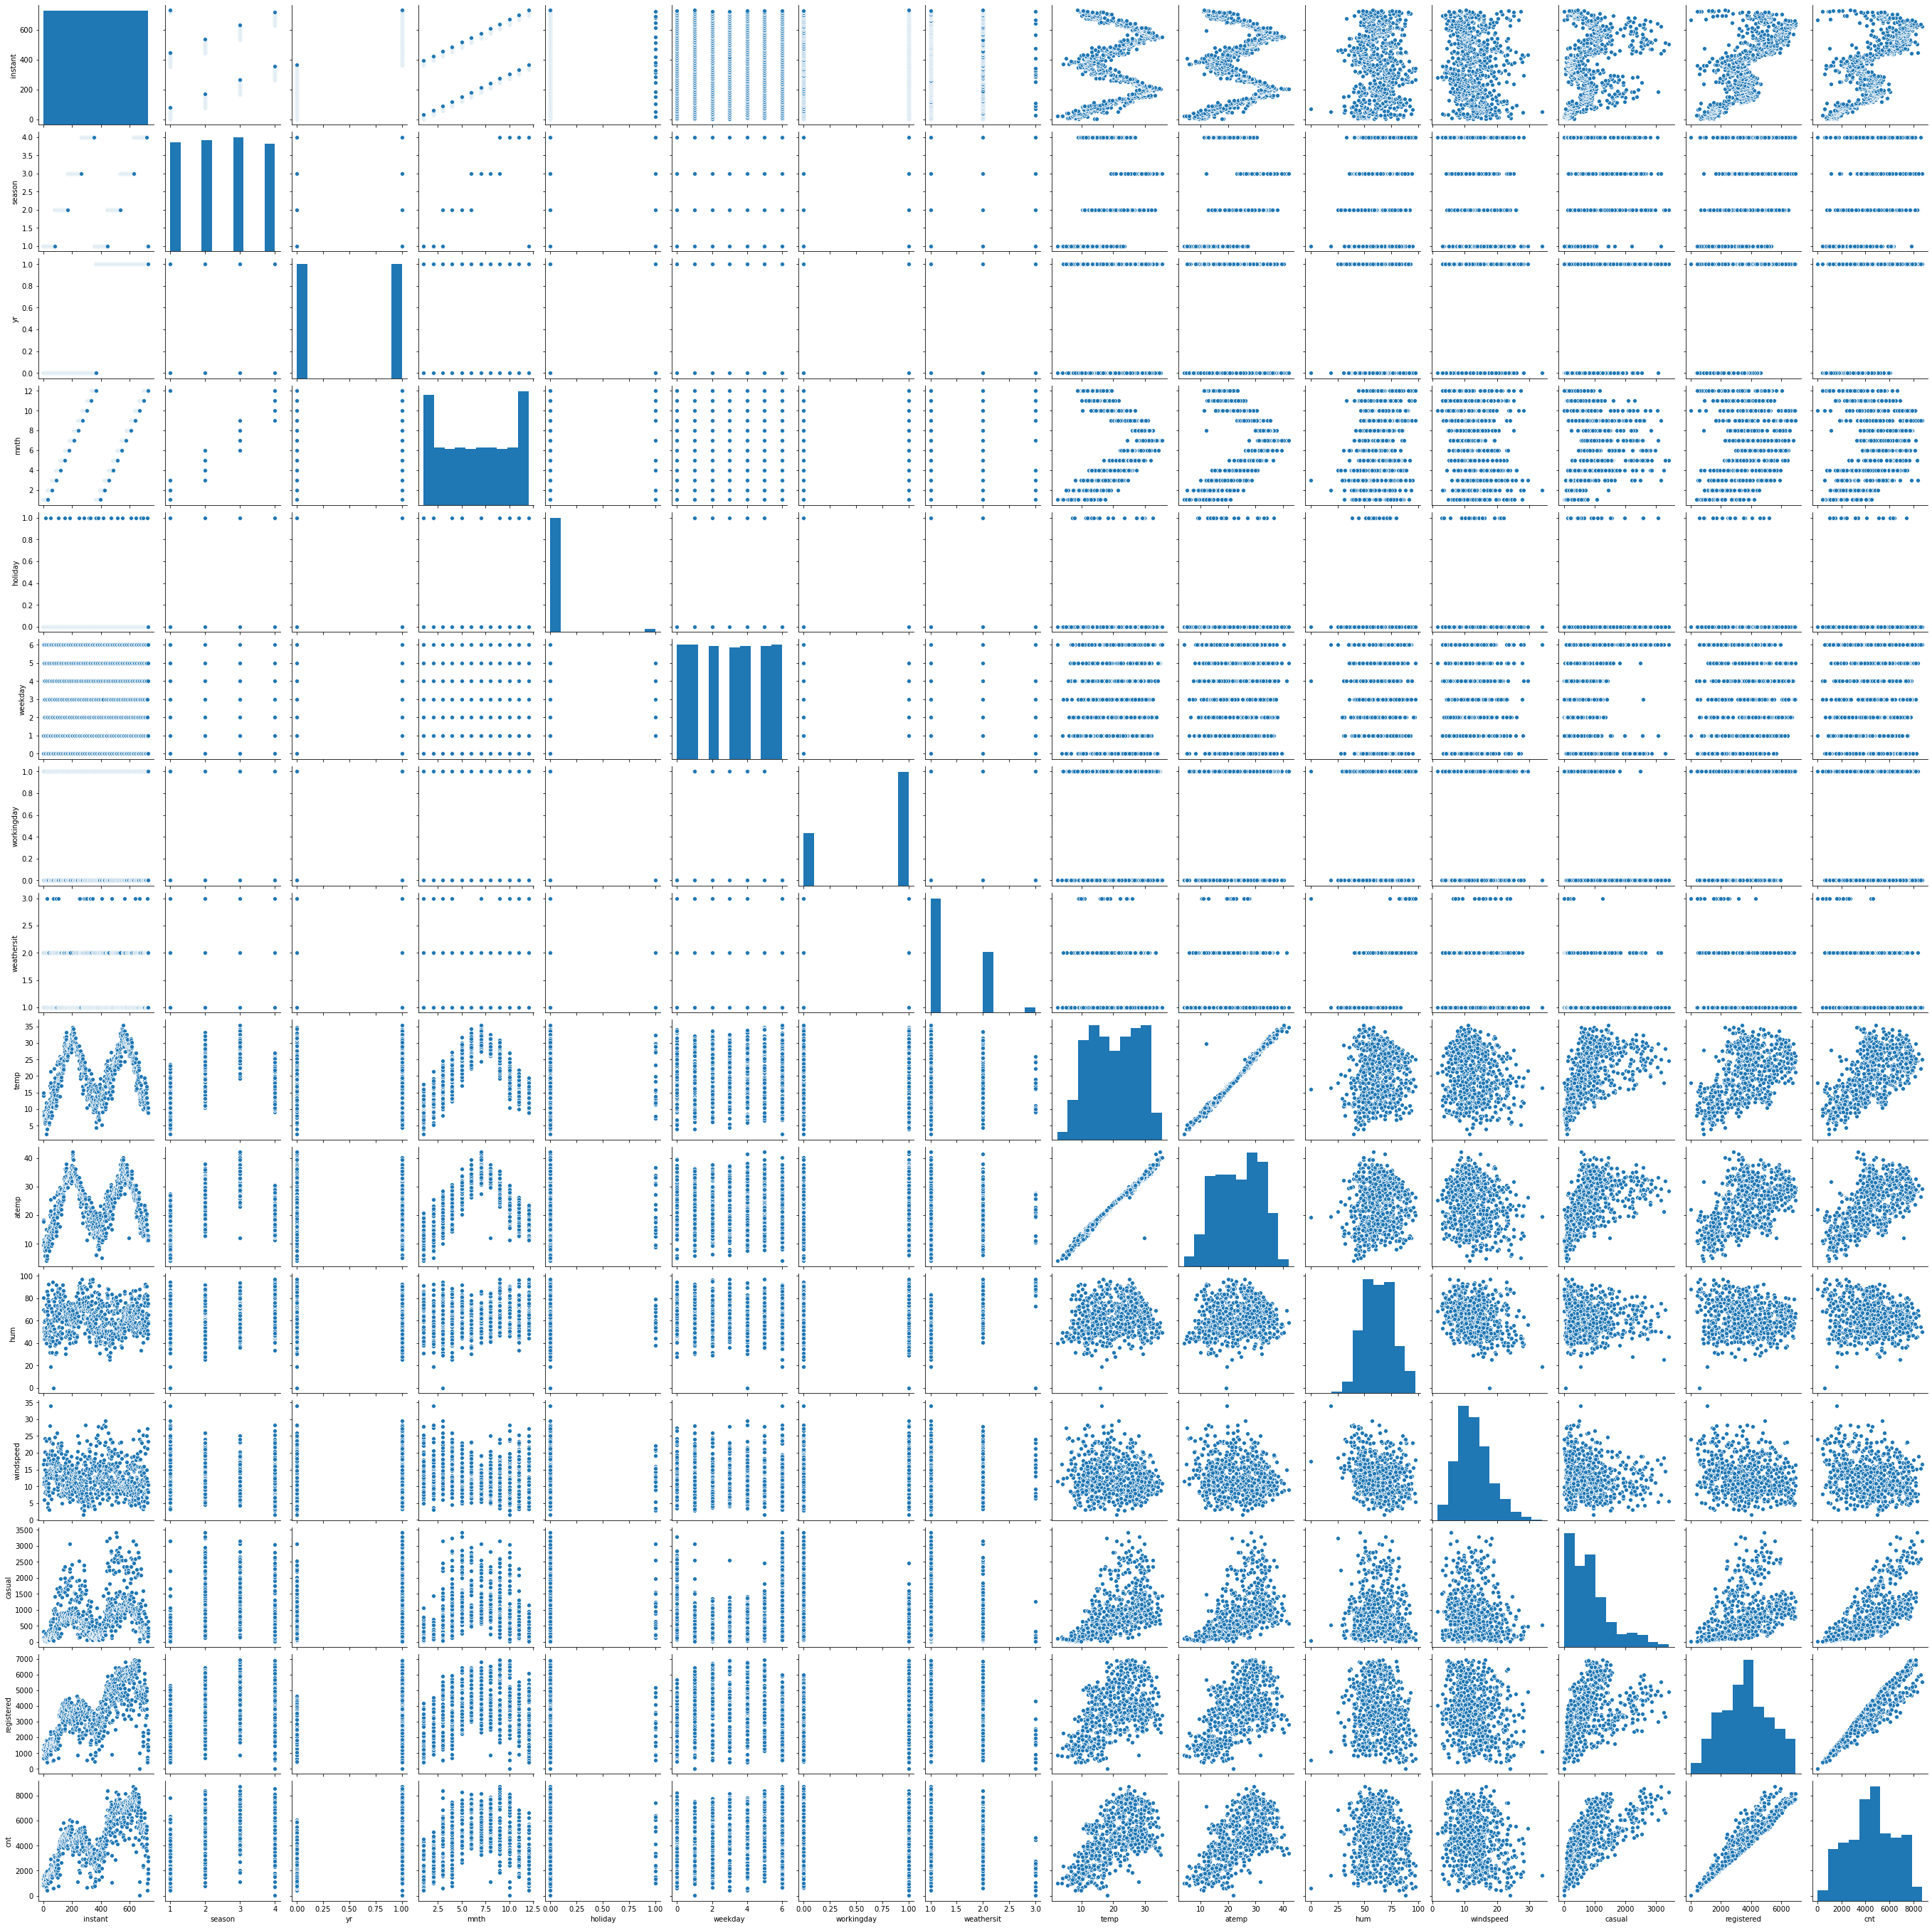

In [9]:
sns.pairplot(data)
plt.show()

## Step 3: Exploratory Data Analysis (EDA)

### Data missing value check

- No data is missing in any of the columns

This eliminates the step of dropping the columns and rows with higher percentage of missing values

In [2]:
round(data.isnull().sum() / len(data), 2)

NameError: name 'data' is not defined

In [1907]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###  Types of variables

1. Binary 
 - yr
 - working
 
 
2. Categorical
 - season
 - weekday
 - weathersit
 - mnth
 

3. Continous
 - atemp
 - hum
 - windspeed


### Converting values

Converting values for all categorical variables and the value conversion is done using the data dictionary provided.

#### Column: `season`

In [1908]:
data['season'] = data.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Column `weekday`

In [1909]:
data['weekday'] = data.weekday.map({0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4: 'friday', 5: 'saturday', 6: 'sunday'})

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,sunday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,monday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,tuesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,wednesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,thursday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1910]:
data['weathersit'] = data.weathersit.map({1: 'clear_partly_cloudy', 2: 'mist_cloudy', 3: 'snow_rain_thunderstorm', 4: 'heavy_rain_ice_pallets'})

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,sunday,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,monday,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,tuesday,1,clear_partly_cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,wednesday,1,clear_partly_cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,thursday,1,clear_partly_cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1911]:
months = {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6:'jun', 7:' jul', 8:'aug', 9:'sep',10:'oct',11:'nov',12:'dec'}
data['mnth'] = data.mnth.map(months)

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sunday,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,monday,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,tuesday,1,clear_partly_cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,wednesday,1,clear_partly_cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,thursday,1,clear_partly_cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Drop variables

Dropping unwanted variables

1. instant - It is just a record index and contributes nothing in data modeling
2. dteday - Not needed as the details of the month and year is already provided in the column `yr` and `month` respectively
3. temp - As the atemp gives the feeling temperature which would affect more the decision of the user in bookings.
4. casual and registered - These two variables are the summation of the target variable i.e cnt and can be ingnored.

In [1912]:
data = data.drop(['instant', 'dteday', 'temp', 'casual', 'registered'], axis = 1)

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sunday,0,mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,monday,0,mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,tuesday,1,clear_partly_cloudy,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,wednesday,1,clear_partly_cloudy,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,thursday,1,clear_partly_cloudy,11.46350,43.6957,12.522300,1600


### BiVariate Analysis

#### Variable: `season`

Here we can see that the more bookings were made in the season of `fall`

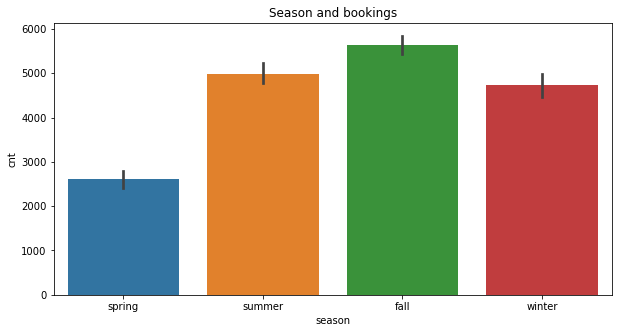

In [1913]:
plt.figure(figsize=(10, 5))

plt.title('Season and bookings')
sns.barplot(x='season', y='cnt', data=data)
plt.show()

#### Variable: `weekday`

Looks like bookings for the days - Friday, Saturday and Sunday are pretty close and monday has the least booking.
We can also see the rise in booking as soon we reach close to weekends

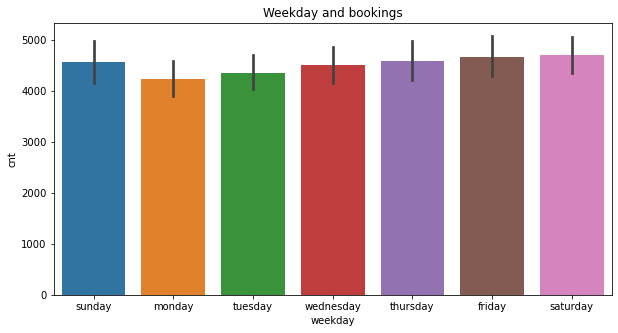

In [1914]:
plt.figure(figsize=(10, 5))
plt.title('Weekday and bookings')
sns.barplot(x='weekday', y='cnt', data=data)
plt.show()

#### Variable: `weathersit`

Looks like customers likes to make booking when the weather is clear or partly cloudy follwed by when it is mist and cloudy

During heavy rains and thunderstorms, lowest bookings were made

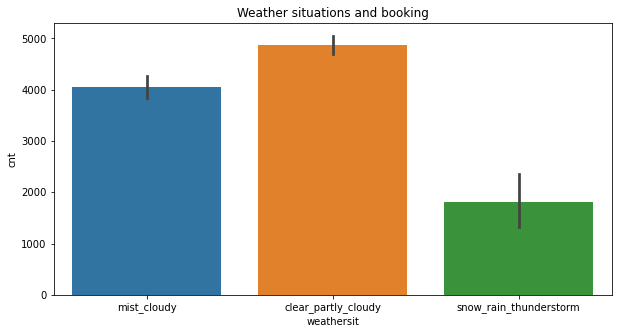

In [1915]:
plt.figure(figsize=(10, 5))
plt.title('Weather situations and booking')
sns.barplot(x='weathersit', y='cnt', data=data)
plt.show()

#### Variable: `mnth`

Bookings were made mostly in the month of June and August and Jan has the least bookings.

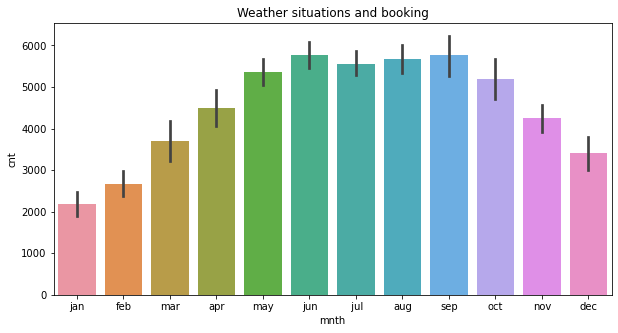

In [1916]:
plt.figure(figsize=(10, 5))
plt.title('Weather situations and booking')
sns.barplot(x='mnth', y='cnt', data=data)
plt.show()

**Looking at the bookings made in each season according to the weather condition**

- Most of the bookings were made in the season of `fall` when the weather was `clear` or `partly cloud`.
- It is also clear that in all of the season, bookings were made when the weather was `clear` or `partly cloud`.

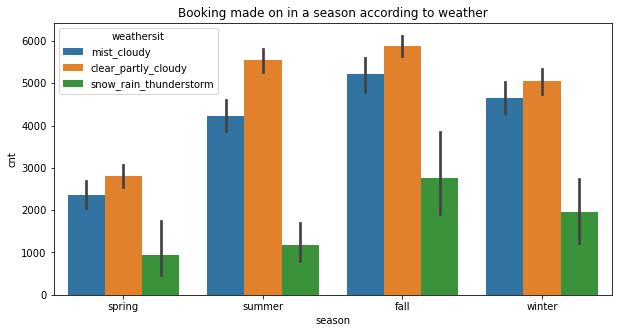

In [1917]:
plt.figure(figsize=(10, 5))
plt.title('Booking made on in a season according to weather')
sns.barplot(x='season', y='cnt', hue='weathersit', data=data)
plt.show()

In [1918]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


### Correlation

Finding correlation between the columns

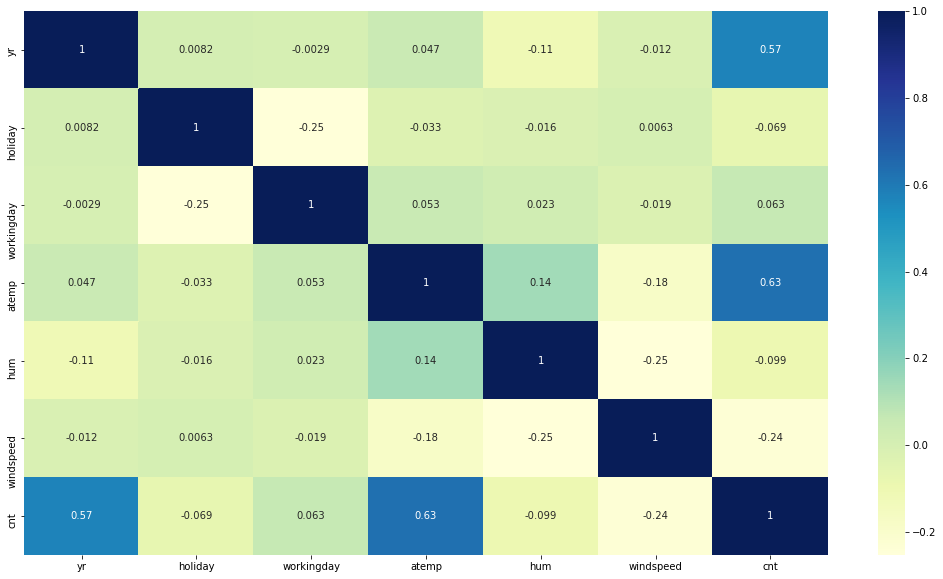

In [1919]:
plt.figure(figsize = (18,10))
corr_mat = data.corr()
sns.heatmap(corr_mat, annot=True, cmap="YlGnBu")
plt.show()

**Variable `atemp` seems to be correlated with the `cnt` the most. Let us see it in a scatter plot.**

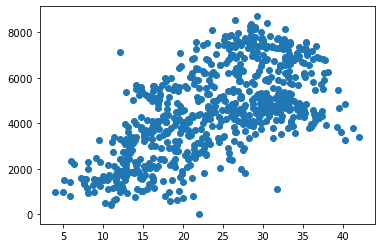

In [1920]:
plt.scatter(data.atemp, data.cnt)
plt.show()

## Step 4: Data Preparation


### 1. Dummy variable

Creating dummy variables of all below categorical variables. After creating the dummy variable, the original columns will also be droped.

1. season
2. weekday
3. weathersit
4. mnth

In [1921]:
season_dummies = pd.get_dummies(data['season'], drop_first=True)
data = pd.concat([data, season_dummies], axis=1)
data = data.drop('season', axis=1)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,sunday,0,mist_cloudy,18.18125,80.5833,10.749882,985,1,0,0
1,0,jan,0,monday,0,mist_cloudy,17.68695,69.6087,16.652113,801,1,0,0
2,0,jan,0,tuesday,1,clear_partly_cloudy,9.47025,43.7273,16.636703,1349,1,0,0
3,0,jan,0,wednesday,1,clear_partly_cloudy,10.60610,59.0435,10.739832,1562,1,0,0
4,0,jan,0,thursday,1,clear_partly_cloudy,11.46350,43.6957,12.522300,1600,1,0,0


In [1922]:
weekday_dummies = pd.get_dummies(data['weekday'], drop_first=True)
data = pd.concat([data, weekday_dummies], axis=1)
data = data.drop('weekday', axis=1)

data.head()

,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,jan,0,0,mist_cloudy,18.18125,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0
1,0,jan,0,0,mist_cloudy,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,0,0
2,0,jan,0,1,clear_partly_cloudy,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0
3,0,jan,0,1,clear_partly_cloudy,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1
4,0,jan,0,1,clear_partly_cloudy,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0


In [1923]:
weather_dummies = pd.get_dummies(data['weathersit'], drop_first=True)
data = pd.concat([data, weather_dummies], axis=1)
data = data.drop('weathersit', axis=1)
data.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist_cloudy,snow_rain_thunderstorm
0,0,jan,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0,1,0
1,0,jan,0,0,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,0,0,1,0
2,0,jan,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0
3,0,jan,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0
4,0,jan,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0


In [1924]:
mnth_dummies = pd.get_dummies(data['mnth'], drop_first=True)
data = pd.concat([data, mnth_dummies], axis=1)
data = data.drop('mnth', axis=1)
data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist_cloudy,snow_rain_thunderstorm,apr,aug,dec,feb,jan,jun,mar,may,nov,oct,sep
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### 2. Correlation

Again checking the correlation between the variables

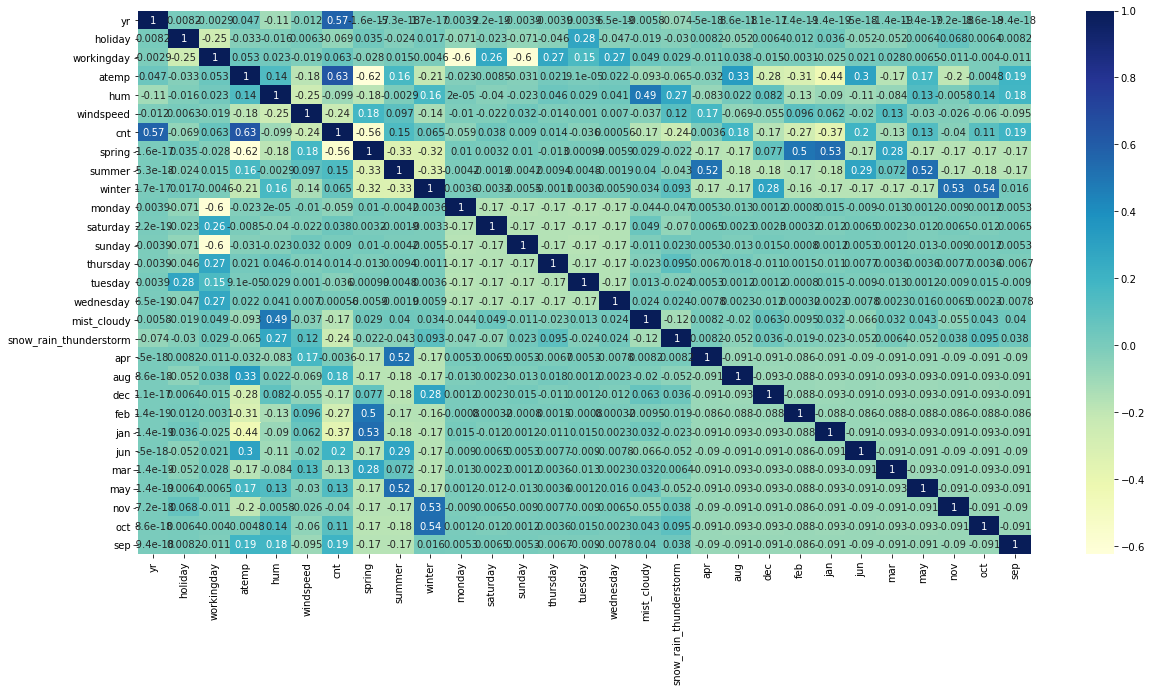

In [1925]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

### 3. Spliting the data in train and test

In [1926]:
# We are defining the random seed, so that the train and test split always has the same rows
np.random.seed(0)
train, test = train_test_split(data, train_size=0.7, random_state=100)

print(train.shape)
print(test.shape)

(510, 29)
(220, 29)


In [1927]:
train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist_cloudy,snow_rain_thunderstorm,apr,aug,dec,feb,jan,jun,mar,may,nov,oct,sep
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
111,0,0,1,16.0977,72.9583,14.707907,1683,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


### 4. Rescaling the features

Scaling the features won't affect the model and predictions and brings the variables on the comparable scale. If we fit the model with the values as is, then some of the coefficients of the model after fitting, might be very large or very small compared to other coefficients.

So it is advised, if we scale the below variables. We can ignore the binary variables (0/1) as scaling them won't have any affect on them.

We will be using MinMaxScaler.

In [1928]:
columns = ['atemp', 'hum', 'windspeed', 'cnt']

scaler = MinMaxScaler()
train[columns] = scaler.fit_transform(train[columns])

In [1929]:
# Using StandardScaler
# columns = ['mnth', 'atemp', 'hum', 'windspeed', 'cnt']
# scaler = StandardScaler()
# train[columns] = scaler.fit_transform(train[columns])

In [1930]:
train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist_cloudy,snow_rain_thunderstorm,apr,aug,dec,feb,jan,jun,mar,may,nov,oct,sep
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [1931]:
train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist_cloudy,snow_rain_thunderstorm,apr,aug,dec,feb,jan,jun,mar,may,nov,oct,sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.345098,0.029412,0.078431,0.096078,0.084314,0.066667,0.088235,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.475867,0.169124,0.269113,0.294988,0.278131,0.249689,0.283915,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5. Dividing dataset in X and y for training

In [1932]:
y_train = train['cnt']
X_train = train.drop('cnt', axis=1)

In [1933]:
X_train

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist_cloudy,snow_rain_thunderstorm,apr,aug,dec,feb,jan,jun,mar,may,nov,oct,sep
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.318819,0.751824,0.380981,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.824359,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
53,0,0,1,0.218747,0.435939,0.111379,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
350,0,0,0,0.223544,0.577930,0.431816,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
79,0,0,1,0.434043,0.759870,0.529881,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [1934]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

## Step 5: Building the model

#### Model 1

We will first build the model using all the columns and see the stats.

In [1935]:
X_train_sm = sm.add_constant(X_train)

lm_1 = sm.OLS(y_train, X_train_sm).fit()

In [1936]:
lm_1.params

const                     0.242380
yr                        0.234388
holiday                   0.010386
workingday                0.089586
atemp                     0.416044
hum                      -0.145906
windspeed                -0.168331
spring                   -0.051922
summer                    0.034816
winter                    0.101506
monday                    0.044005
saturday                  0.013083
sunday                    0.098403
thursday                  0.004891
tuesday                  -0.013201
wednesday                -0.008305
mist_cloudy              -0.061167
snow_rain_thunderstorm   -0.253008
apr                       0.014692
aug                       0.056571
dec                      -0.037924
feb                      -0.025674
jan                      -0.058861
jun                       0.038926
mar                       0.014348
may                       0.050962
nov                      -0.031016
oct                       0.022298
sep                 

The adjusted R-squared of the model is looking good and there's not much of the difference in the R-sqaured and adjusted R-squared. However, we can see for some variables, the p-value is above 0.05.

We could first calculate the VIF of the columns to check the multicollinearity of the variables with each other, however for now, let us just simply drop the variables with high `p-value` and see does it affects the model performance.

In [1937]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.07e-179
Time:                        22:54:48   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     482   BIC:                            -871.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### Model 2

Dropping variable `thursday`

In [1938]:
X_train_m1 = X_train.drop('thursday', axis=1)
X_train_sm = sm.add_constant(X_train_m1)
lm_2 = sm.OLS(y_train, X_train_sm).fit()

Dropping variable `holiday` didn't make much of an effect on the model. 
Let us try dropping variable `apr`.

In [1939]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.09e-180
Time:                        22:54:48   Log-Likelihood:                 523.15
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     483   BIC:                            -878.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [1940]:
X_train_m2 = X_train_m1.drop('mar', axis=1)
X_train_sm = sm.add_constant(X_train_m2)
lm_3 = sm.OLS(y_train, X_train_sm).fit()

In [1941]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     109.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.11e-181
Time:                        22:54:48   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -994.1
Df Residuals:                     484   BIC:                            -884.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### 7: Feature Selection

Models build above have higher accuracy but has lots of variables and will make it difficult to analyze and give any conclusion on what company must do increase the booking counts.

We can try dropping variables further and see if the adjusted R-squared value goes up or not. 
However, the process above was the `Manual feature elimination` apporach and is lengthy. We will try a better approach with a combination of the `Recursive Feature Elmination` and manual Manual feature elimination.

In [1942]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [1943]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1),
 ('monday', False, 7),
 ('saturday', False, 13),
 ('sunday', True, 1),
 ('thursday', False, 14),
 ('tuesday', False, 8),
 ('wednesday', False, 9),
 ('mist_cloudy', True, 1),
 ('snow_rain_thunderstorm', True, 1),
 ('apr', False, 11),
 ('aug', True, 1),
 ('dec', False, 2),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jun', False, 6),
 ('mar', False, 12),
 ('may', False, 5),
 ('nov', False, 3),
 ('oct', False, 10),
 ('sep', True, 1)]

In [1944]:
### Columns the RFE selected
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'summer',
       'winter', 'sunday', 'mist_cloudy', 'snow_rain_thunderstorm', 'aug',
       'feb', 'jan', 'sep'],
      dtype='object')

In [1945]:
### Coliumns that RFE didn't select
X_train.columns[~rfe.support_]

Index(['spring', 'monday', 'saturday', 'thursday', 'tuesday', 'wednesday',
       'apr', 'dec', 'jun', 'mar', 'may', 'nov', 'oct'],
      dtype='object')

#### Model 4

This time building the models using only the columns selected by RFE.

In [1946]:
X_train_m4 = X_train[col]
X_train_sm = sm.add_constant(X_train_m4)
lm_4 = sm.OLS(y_train, X_train_sm).fit()

In [1947]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     109.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.11e-181
Time:                        22:54:50   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -994.1
Df Residuals:                     484   BIC:                            -884.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### VIF

We will no calculate the VIF of the columns and see if the elimination done was right or we can do better.

We see that RFE has selected two colums with higher VIF which could lead to multicollinearity and we can build another model by dropping first `hum` from the model.

In [1948]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_new = X_train_m4
vif = pd.DataFrame()
vif['Features'] = X_train_new[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,22.78
3,atemp,13.21
2,workingday,5.15
5,windspeed,4.02
7,winter,2.41
6,summer,2.21
9,mist_cloudy,2.19
0,yr,2.06
8,sunday,1.93
13,jan,1.81


In [1949]:
X_train_m5 = X_train_m4.drop('hum', axis=1)

In [1950]:
X_train_sm = sm.add_constant(X_train_m5)
lm_5 = sm.OLS(y_train, X_train_sm).fit()

In [1951]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.72e-185
Time:                        22:54:51   Log-Likelihood:                 502.48
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     495   BIC:                            -911.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [1952]:
X_train_m6 = X_train_m5.drop('feb', axis=1)

In [1953]:
X_train_sm = sm.add_constant(X_train_m6)
lm_6 = sm.OLS(y_train, X_train_sm).fit()

In [1954]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.06e-185
Time:                        22:54:51   Log-Likelihood:                 501.27
No. Observations:                 510   AIC:                            -974.5
Df Residuals:                     496   BIC:                            -915.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [1955]:
X_train_m7 = X_train_m6.drop('holiday', axis=1)

In [1956]:
X_train_sm = sm.add_constant(X_train_m7)
lm_7 = sm.OLS(y_train, X_train_sm).fit()

In [1957]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.96e-186
Time:                        22:54:52   Log-Likelihood:                 499.50
No. Observations:                 510   AIC:                            -973.0
Df Residuals:                     497   BIC:                            -918.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

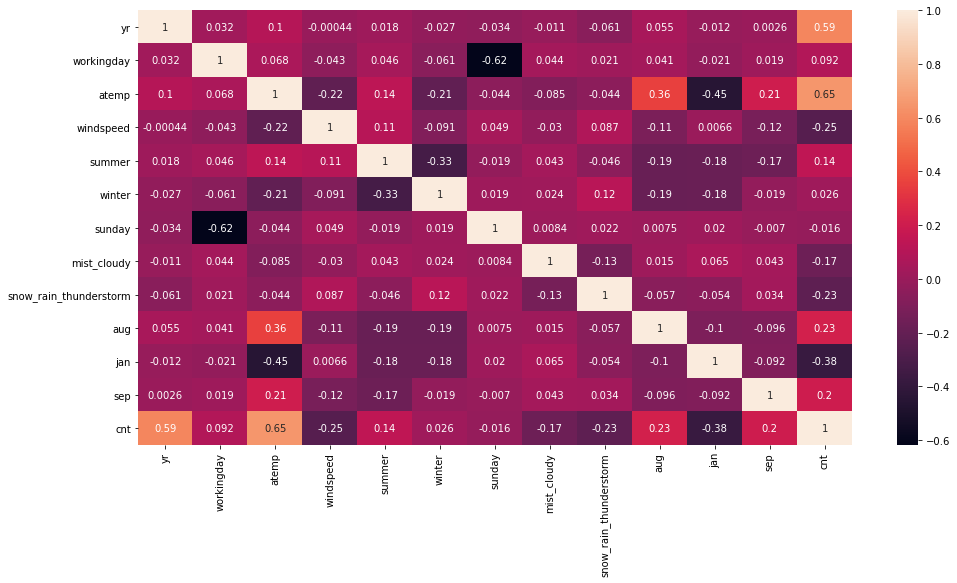

In [1958]:
plt.figure(figsize=(16, 8))
df = pd.concat([X_train_m7, y_train], axis=1)
sns.heatmap(df.corr(),annot=True)
plt.show()

In [1959]:
X_train_m8 = X_train_m7.drop('sunday', axis=1)

In [1960]:
X_train_sm = sm.add_constant(X_train_m8)
lm_8 = sm.OLS(y_train, X_train_sm).fit()

In [1961]:
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.62e-183
Time:                        22:54:53   Log-Likelihood:                 489.22
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     498   BIC:                            -903.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [1962]:
X_train_m9 = X_train_m8.drop('workingday', axis=1)

In [1963]:
X_train_sm = sm.add_constant(X_train_m9)
lm_9 = sm.OLS(y_train, X_train_sm).fit()

In [1964]:
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.53e-183
Time:                        22:54:53   Log-Likelihood:                 485.84
No. Observations:                 510   AIC:                            -949.7
Df Residuals:                     499   BIC:                            -903.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [1965]:
X_train_m10 = X_train_m9.drop('jan', axis=1)

In [1966]:
X_train_sm = sm.add_constant(X_train_m10)
lm_10 = sm.OLS(y_train, X_train_sm).fit()

In [1967]:
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.58e-182
Time:                        22:54:54   Log-Likelihood:                 482.44
No. Observations:                 510   AIC:                            -944.9
Df Residuals:                     500   BIC:                            -902.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [1968]:
X_train_m11 = X_train_m10.drop('aug', axis=1)

In [1969]:
X_train_sm = sm.add_constant(X_train_m11)
lm_11 = sm.OLS(y_train, X_train_sm).fit()

In [1970]:
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     282.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.52e-180
Time:                        22:54:54   Log-Likelihood:                 473.99
No. Observations:                 510   AIC:                            -930.0
Df Residuals:                     501   BIC:                            -891.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [1971]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_new = X_train_m11
cols = X_train_new.columns
vif = pd.DataFrame()
vif['Features'] = X_train_new[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,3.69
2,windspeed,2.99
0,yr,2.00
3,summer,1.58
5,mist_cloudy,1.48
4,winter,1.38
7,sep,1.20
6,snow_rain_thunderstorm,1.08


### 7: Residual analysis of the train data

In [1972]:
y_train_pred = lm_11.predict(X_train_sm)

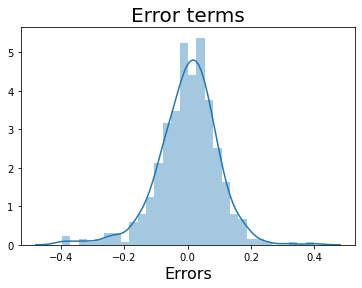

In [1973]:
plt.figure()
sns.distplot((y_train - y_train_pred))
plt.title('Error terms', fontsize=20)
plt.xlabel('Errors', fontsize=16)
plt.show()

#### As we can see the error terms are independent of each other

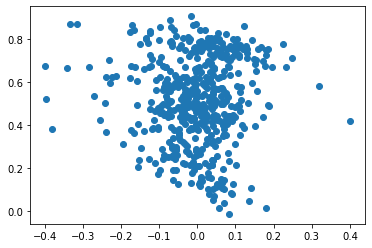

In [1990]:
plt.scatter((y_train - y_train_pred), y_train_pred)
plt.show()

### Step 6: Making predictions from the final model

Now that we have a model, let us try predicting the values and see how good the model is. We will apply the same steps we did during the data preperation on the test data as well.

In [1974]:
columns = ['atemp', 'hum', 'windspeed', 'cnt']

test[columns] = scaler.transform(test[columns])

In [1975]:
test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist_cloudy,snow_rain_thunderstorm,apr,aug,dec,feb,jan,jun,mar,may,nov,oct,sep
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182,0.318182,0.027273,0.090909,0.059091,0.086364,0.100000,0.077273,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,0.459303,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881,0.466833,0.163248,0.288135,0.236333,0.281541,0.300684,0.267633,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing data in X and y

In [1976]:
y_test = test.pop('cnt')
X_test = test

In [1750]:
X_test

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist_cloudy,snow_rain_thunderstorm,apr,aug,dec,feb,jan,jun,mar,may,nov,oct,sep
184,0,1,0,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.511907,0.756118,0.283397,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
127,0,0,0,0.577380,0.650923,0.069510,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
640,1,0,1,0.682653,0.817947,0.052115,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
72,0,0,1,0.332005,0.512107,0.203418,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1751]:
### Dropping all columns that are not selected by RFE
X_test = X_test[X_train_m11.columns]

X_test

,yr,atemp,windspeed,summer,winter,mist_cloudy,snow_rain_thunderstorm,sep
184,0,0.769660,0.084219,0,0,1,0,0
535,1,0.842587,0.153728,1,0,0,0,0
299,0,0.496145,0.334206,0,1,1,0,0
221,0,0.795343,0.339570,0,0,0,0,0
152,0,0.741471,0.537414,1,0,0,0,0
...,...,...,...,...,...,...,...,...
702,1,0.511907,0.283397,0,1,0,0,0
127,0,0.577380,0.069510,1,0,0,0,0
640,1,0.682653,0.052115,0,1,1,0,0
72,0,0.332005,0.203418,0,0,0,0,0


#### Predicting the values

In [1754]:
X_test_sm = sm.add_constant(X_test)
y_pred = lm_11.predict(X_test_sm)

In [1755]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [1758]:
print('Mean Squared Error: ', round(mse, 2))
print('R squared: ', round(r_squared, 2))

Mean Squared Error:  0.01
R squared:  0.79


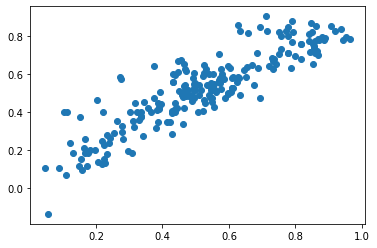

In [1759]:
#Actual vs Predicted
# c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.show()

## Recommendations

In [1795]:
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     282.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.52e-180
Time:                        00:39:34   Log-Likelihood:                 473.99
No. Observations:                 510   AIC:                            -930.0
Df Residuals:                     501   BIC:                            -891.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

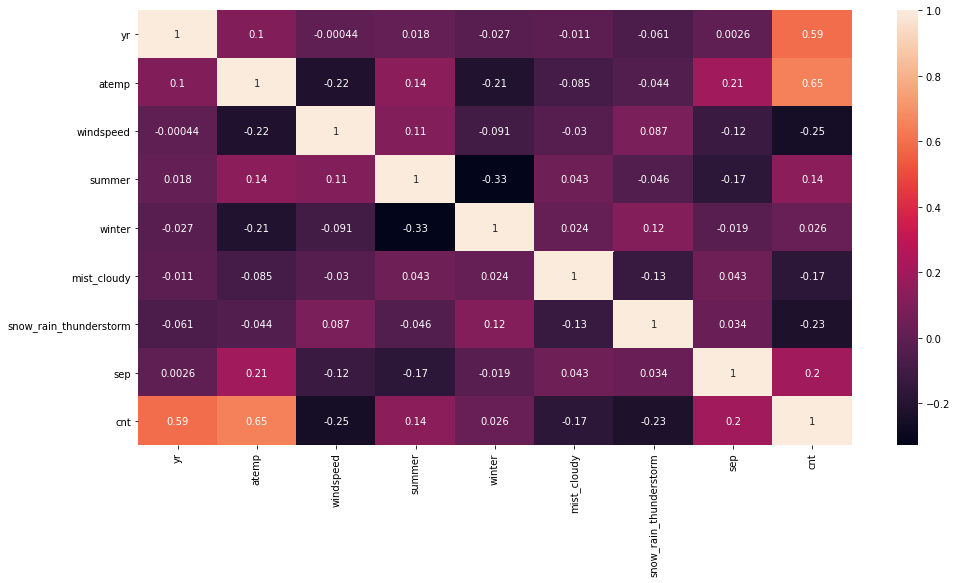

In [1799]:
plt.figure(figsize=(16, 8))
final_df = pd.concat([X_train_m11, y_train], axis=1)
sns.heatmap(final_df.corr(), annot=True)
plt.show()

### Recommendations

Below variables are the significant variables.

In [1843]:
list(X_train_m11.columns)

['yr',
 'atemp',
 'windspeed',
 'summer',
 'winter',
 'mist_cloudy',
 'snow_rain_thunderstorm',
 'sep']

#### **Column**: `atemp`

Adjusted temperature has the higest affect on the bike bookings, and the number of bookings are at highest when the `atemp` is between 26 - 30 celcius.

In [1872]:
re_col = ['atemp', 'hum', 'windspeed', 'cnt']
rescaled = scaler.inverse_transform(train[re_col])
df = pd.DataFrame(rescaled, columns=["atemp", "hum", "windspeed", "cnt"])
df.groupby(pd.cut(df.atemp, bins=10)).cnt.sum().reset_index().sort_values('cnt', ascending=False)

,atemp,cnt
6,"(26.808, 30.617]",485949.0
7,"(30.617, 34.427]",453479.0
5,"(22.999, 26.808]",356601.0
4,"(19.19, 22.999]",271670.0
3,"(15.381, 19.19]",246494.0
8,"(34.427, 38.236]",204538.0
2,"(11.572, 15.381]",196358.0
1,"(7.763, 11.572]",43361.0
9,"(38.236, 42.045]",20351.0
0,"(3.915, 7.763]",8721.0


#### Column: `windspeed`

Windspeed is shows an effect where the higher the windspeed, the lower the bike bookings count.

The ideal windspeed where most of the bookings were made is b/w 9-15 and lowest bookings were made b/w 27-34.

In [1873]:
df.groupby(pd.cut(df.windspeed, bins=5)).cnt.sum().reset_index().sort_values('cnt', ascending=False)

,windspeed,cnt
1,"(9.068, 15.301]",1050238.0
0,"(2.803, 9.068]",649340.0
2,"(15.301, 21.534]",473637.0
3,"(21.534, 27.767]",96987.0
4,"(27.767, 34.0]",17320.0


#### Column: `summer`

When it is not summer, then most of the bookings were done. People tend not to book bikes when it is summer

In [1878]:
data.groupby('summer').cnt.sum()

summer
0    2372256
1     918589
Name: cnt, dtype: int64